In [2]:
library(evently)
library(dplyr)
library(repr)
options(repr.plot.width=14, repr.plot.height=7, repr.plot.res = 200)

# Proces Hawkesa

Pora na przetworzenie stworzonych wcześniej kaskad.

## Kaskada pierwsza

Wczytanie danych:

In [3]:
history <- read.csv(file = '1067149009867878400.csv', header = T)
history <- history %>% select(-X)
history$time <- as.integer(history$time) 
head(history)

,time,magnitude
,<int>,<int>
1,0,68853
2,12,167
3,20,262
4,28,3906
5,45,359
6,51,3292


Dopasowanie modelu:

In [6]:
train_history <- history[with(history, time <= 41417),]
fitted_model <- fit_series(train_history, model_type = 'mEXP', observation_time = max(train_history$time))
fitted_model

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 1.77e+00; beta 2.27e-01; theta 2.44e+00
- par:
  K 1.09e-01; beta 3.36e-01; theta 3.10e-03
- Neg Log Likelihood: 9339.66 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 

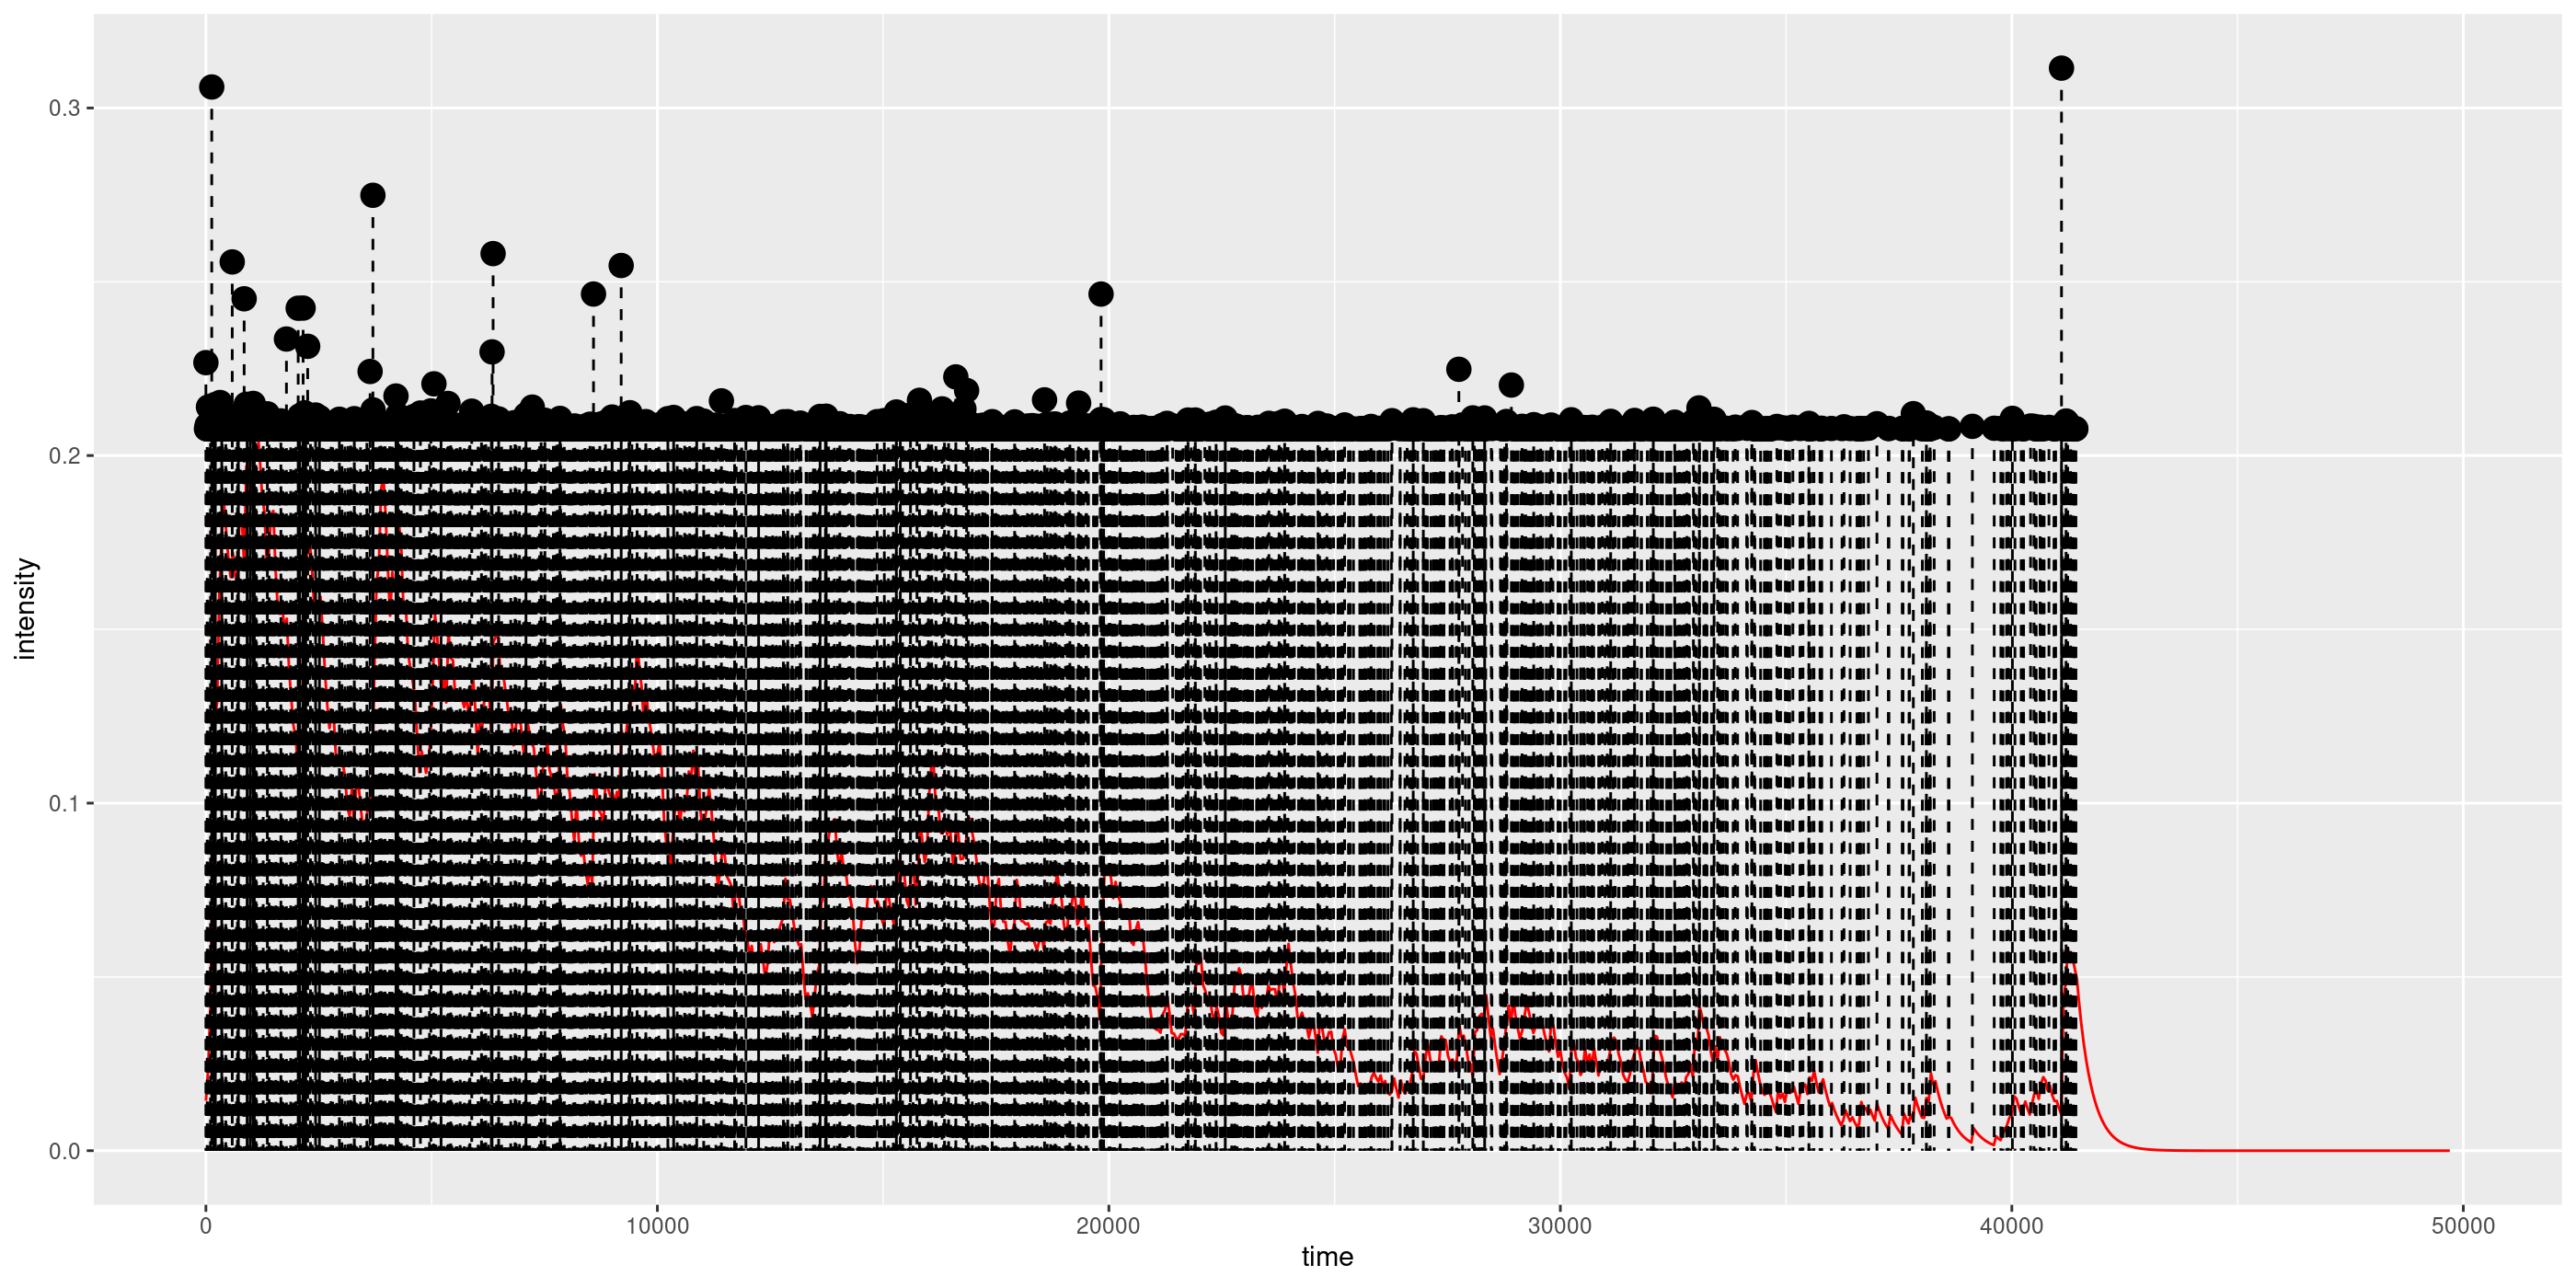

In [7]:
plot_event_series(fitted_model)

Współczynnik rozgałęzienia:

In [8]:
get_branching_factor(fitted_model)

[1] 0.1627136

Finalny rozmiar kaskady:

In [9]:
predict_final_popularity(fitted_model)

[1] 2661.48

mEXP przewidział, że kaskada będzie miała rozmiar 2660, w treningowym secie miała 2640, a faktyczny rozmiar to 3300.

## Kaskada druga

Wczytanie danych:

In [3]:
history <- read.csv(file = '1066155330986541058-cut.csv', header = T)
history <- history %>% select(-X)
history$time <- as.integer(history$time) 
head(history)

,time,magnitude
,<int>,<int>
1,0,1712266
2,13,6305
3,14,818
4,14,451
5,15,2799
6,18,9038


Dopasowanie modelu:

In [4]:
train_history <- history[with(history, time <= 13995),] 
fitted_model <- fit_series(train_history, model_type = 'mEXP', observation_time = max(train_history$time))
fitted_model

- Model: mEXP 
- No. of cascades: 1 
- init_par:
  K 3.03e+00; beta 6.66e-01; theta 3.61e-01
- par:
  K 1.61e-03; beta 8.42e-01; theta 1.47e-03
- Neg Log Likelihood: 7097.77 
- lower_bound:
  K 1.00e-100; beta 1.00e-100; theta 1.00e-100
- upper_bound:
  K 1.00e+04; beta 1.02e+00; theta 3.00e+02
- Convergence: 0 

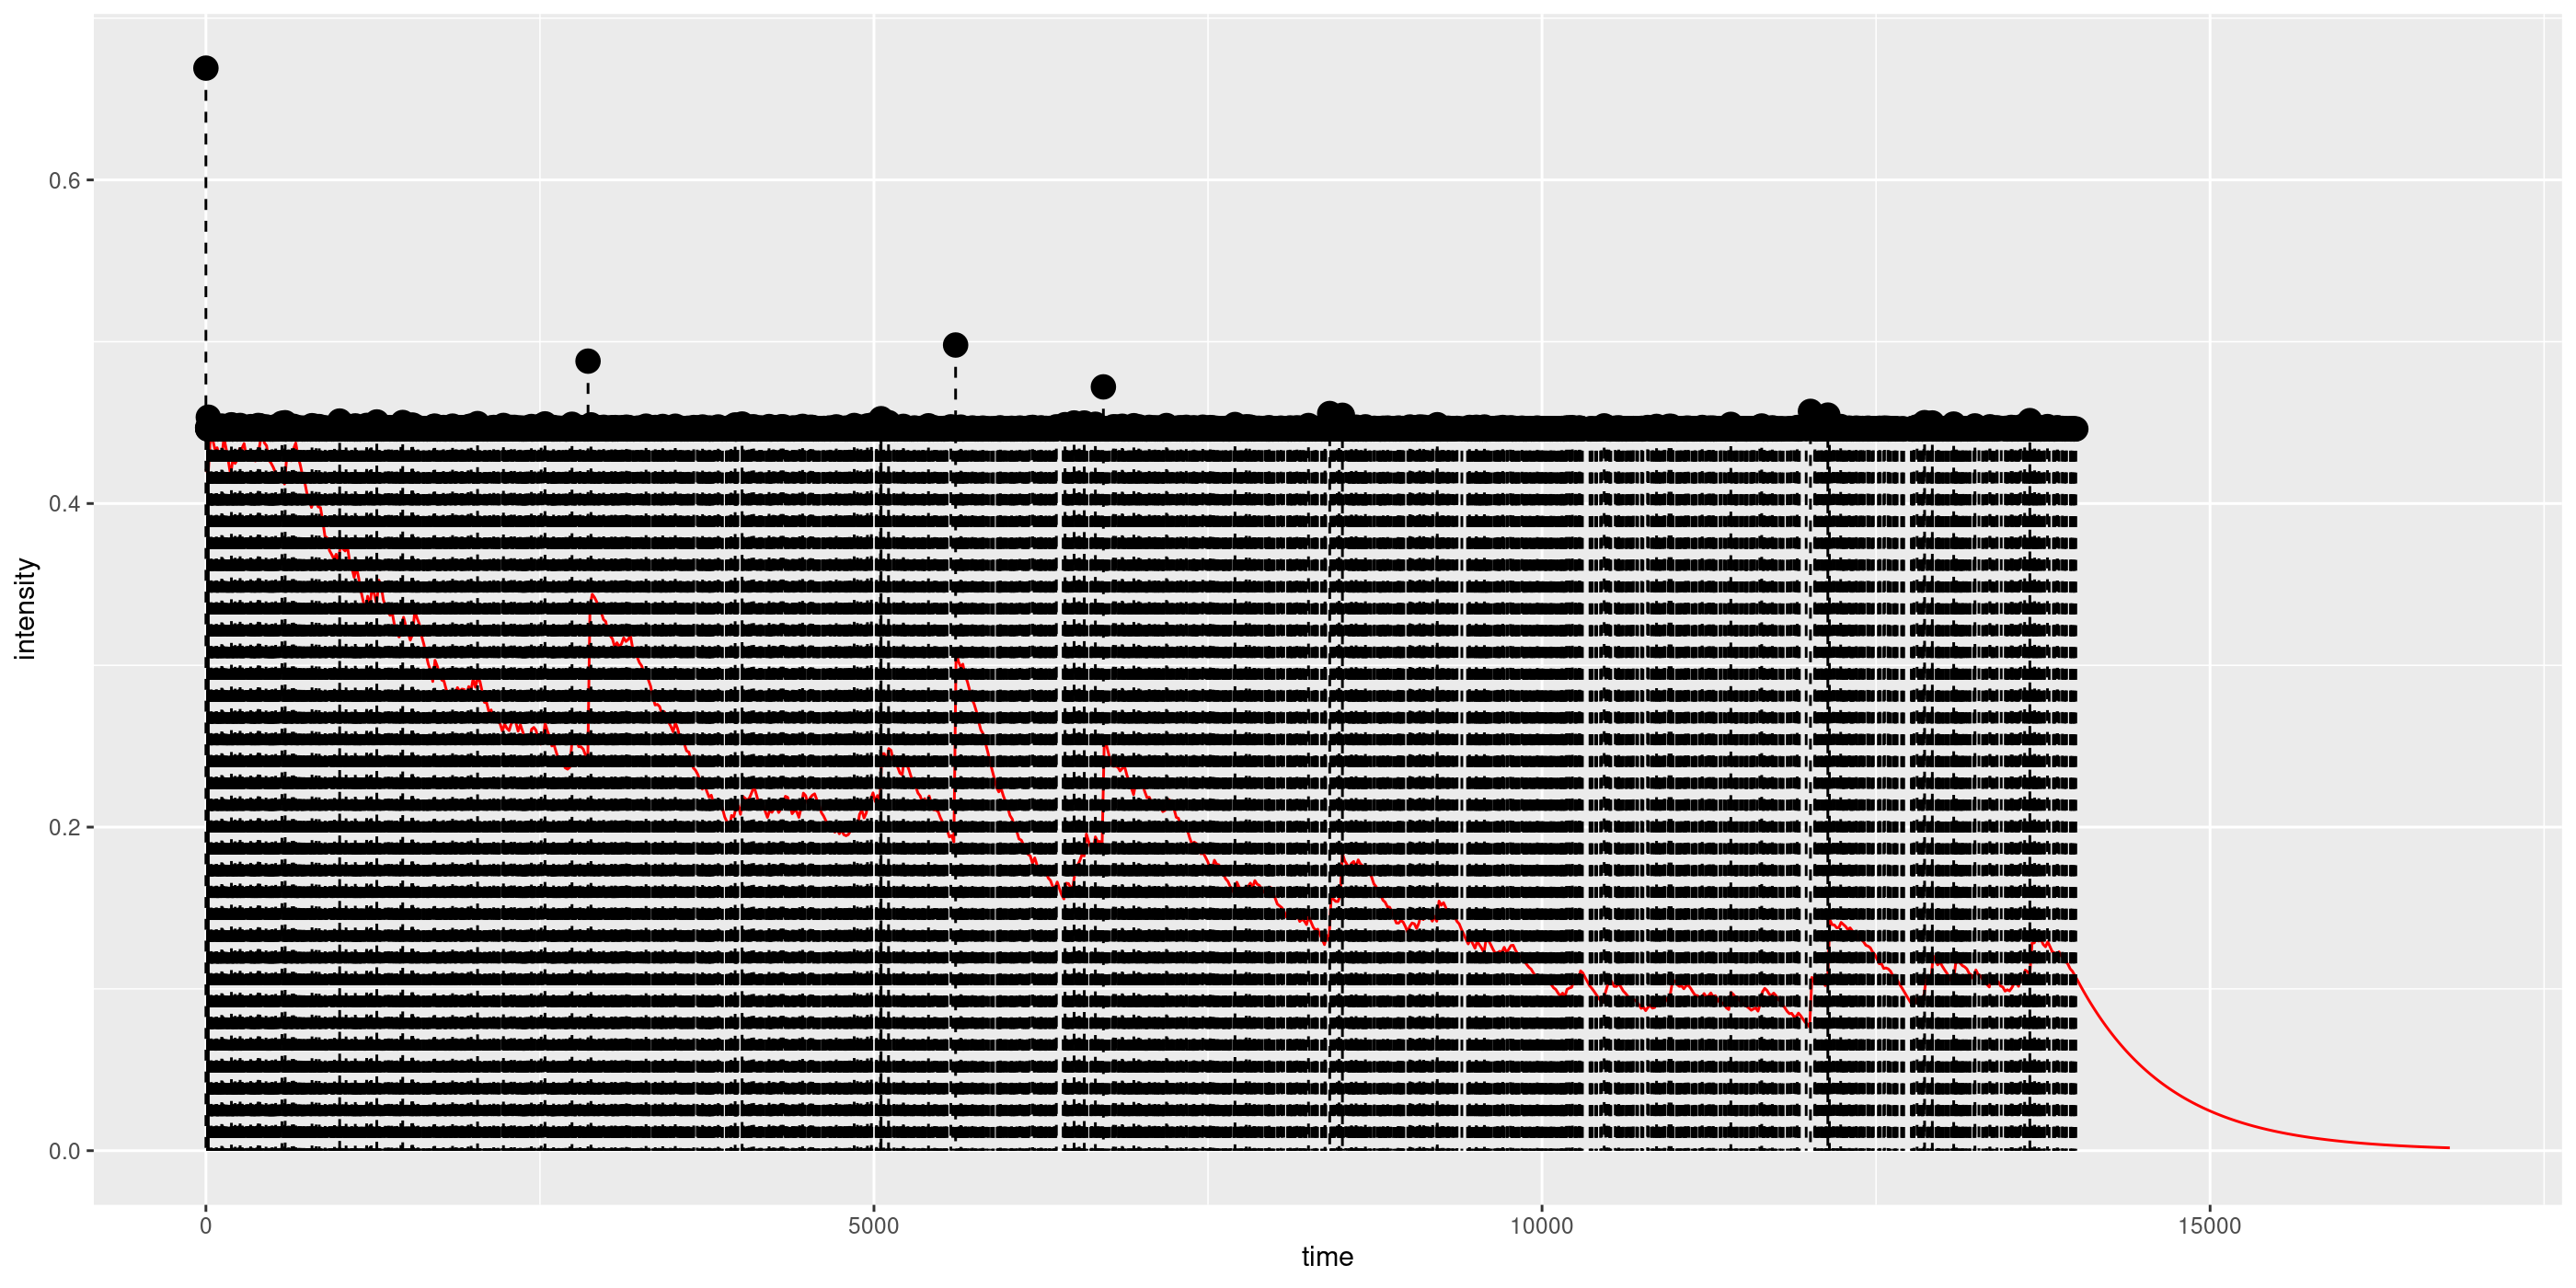

In [5]:
plot_event_series(fitted_model)

Współczynnik rozgałęzienia:

In [6]:
get_branching_factor(fitted_model)

[1] 0.009425742

Finalny rozmiar kaskady:

In [7]:
predict_final_popularity(fitted_model)

[1] 2874.742